This notebook is where I will test my knowledge and concepts. 

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
input_file = 'C:/Users/deanc/Documents/Datasets/Titanic/train.csv'
df_titanic = pd.read_csv(input_file)

In [3]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Pclass
3    100.0
1    100.0
2    100.0
Name: count, dtype: float64

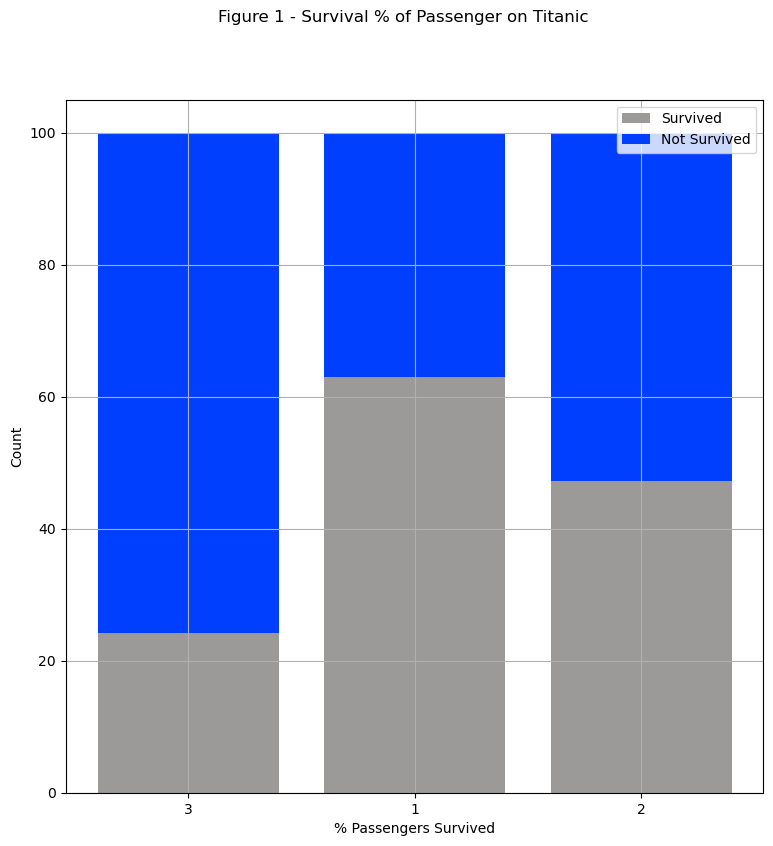

In [4]:
df_survived = df_titanic[df_titanic['Survived']==1]
df_not_survived = df_titanic[df_titanic['Survived']==0]

counts = df_titanic['Pclass'].value_counts(dropna=True)
values = counts.index

pclass_survived = df_survived['Pclass'].value_counts(dropna=True).reindex(counts.index,fill_value=0)
pclass_not_survived = df_not_survived['Pclass'].value_counts(dropna=True).reindex(counts.index,fill_value=0)

pclass_survived_percentage = pclass_survived/counts * 100
pclass_not_survived_percentage = pclass_not_survived/counts * 100

x_positions = np.arange(len(values))

figure1,ax = plt.subplots(figsize=(9,9))
ax.grid()
ax.set_xticks(x_positions,values)
ax.set_xlabel('% Passengers Survived')
ax.set_ylabel('Count')
figure1.suptitle('Figure 1 - Survival % of Passenger on Titanic')

ax.bar(x_positions, pclass_survived_percentage, color='#9b9a99', label='Survived')
ax.bar(x_positions,pclass_not_survived_percentage, bottom=pclass_survived_percentage, color='#003ffe', label='Not Survived')
plt.legend()
(pclass_survived_percentage + pclass_not_survived_percentage)

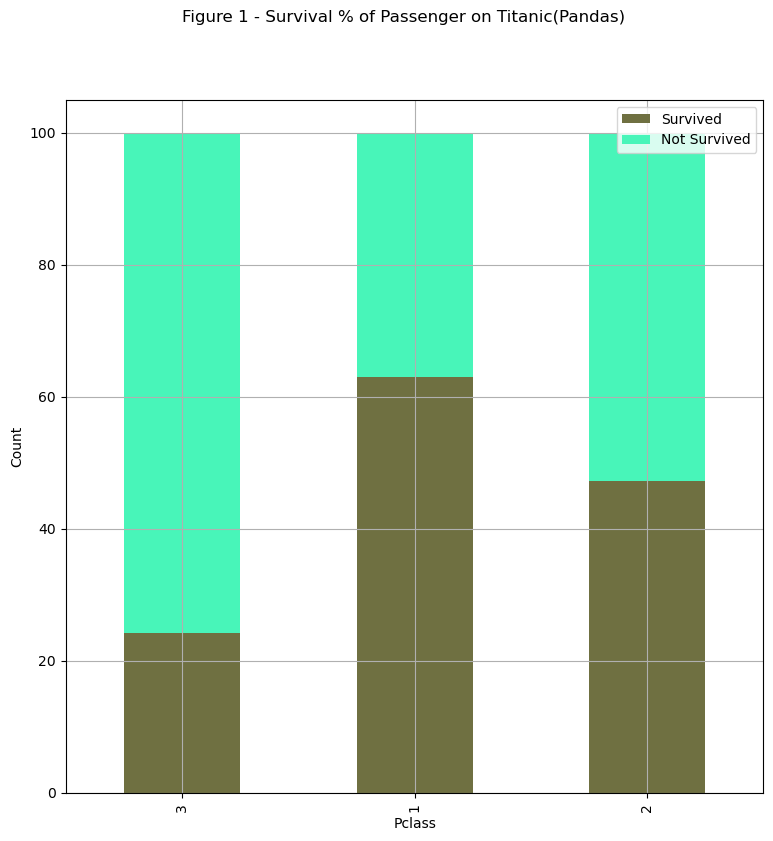

In [6]:
df_survived = df_titanic[df_titanic['Survived']==1]
df_not_survived = df_titanic[df_titanic['Survived']==0]

counts = df_titanic['Pclass'].value_counts(dropna=True)

pclass_survived = df_survived['Pclass'].value_counts(dropna=True).reindex(counts.index,fill_value=0)
pclass_not_survived = df_not_survived['Pclass'].value_counts(dropna=True).reindex(counts.index, fill_value=0)

pclass_survived_percentage = pclass_survived/counts * 100
pclass_not_survived_percentage = pclass_not_survived/counts * 100

pclass_survived_percentage.name='Survived'
pclass_not_survived_percentage.name='Not Survived'

df = pd.concat([pclass_survived_percentage,pclass_not_survived_percentage], axis=1)

fig1, ax = plt.subplots(figsize=(9,9))
plt.xlabel('% Passengers Survived')
plt.ylabel('Count')
fig1.suptitle('Figure 1 - Survival % of Passenger on Titanic(Pandas)')

df.plot.bar(stacked=True, grid=True, ax=ax, color=['#6f7041','#48f5b9'])
plt.show()